In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date.date)

2017-08-23


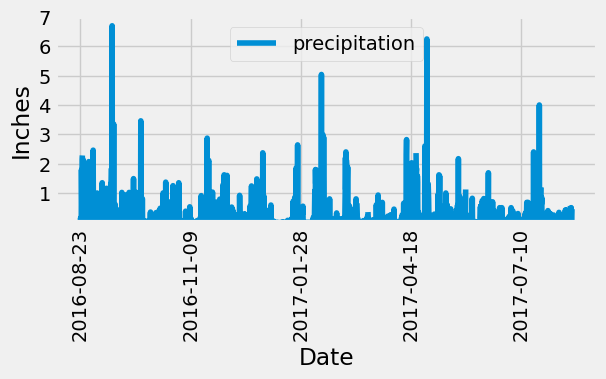

In [20]:
# Sort the dataframe by date
last_year_df['date'] = pd.to_datetime(last_year_df['date'])
last_year_df['date'] = last_year_df['date'].map(lambda dt: dt.strftime('%Y-%m-%d'))

# Use Pandas Plotting with Matplotlib to plot the data
datetime_series = pd.to_datetime(last_year_df['date'])
datetime_index  = pd.DatetimeIndex(datetime_series.values)
last_year_df.set_index(datetime_index, inplace=True)

listOf_Yticks = [1, 2, 3, 4, 5, 6, 7]
last_year_df.plot(x='date', y='precipitation', rot=90, figsize=(6, 4))
plt.tight_layout()
plt.ylabel('Inches')
plt.xlabel('Date')
plt.locator_params(axis="x", nbins=9)
plt.ylim([0, 7])
plt.yticks(listOf_Yticks)

plt.show()

In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_year_sum_df = last_year_df.groupby(["date"])["precipitation"].agg(["count", "mean", "median", "sum", "std", "sem"])
last_year_sum_df.reset_index(inplace=True)
print(last_year_sum_df)

# Alternative summary statistics for the precipitation data
summary_stats = last_year_sum_df.describe()
print(summary_stats)

           date  count      mean  median   sum       std       sem
0    2016-08-23      6  0.451667   0.100  2.71  0.706468  0.288414
1    2016-08-24      6  1.555000   1.800  9.33  0.840541  0.343150
2    2016-08-25      7  0.077143   0.080  0.54  0.071813  0.027143
3    2016-08-26      6  0.016667   0.015  0.10  0.016330  0.006667
4    2016-08-27      5  0.064000   0.020  0.32  0.081731  0.036551
..          ...    ...       ...     ...   ...       ...       ...
361  2017-08-19      3  0.030000   0.000  0.09  0.051962  0.030000
362  2017-08-20      2  0.005000   0.005  0.01  0.007071  0.005000
363  2017-08-21      3  0.193333   0.020  0.58  0.317700  0.183424
364  2017-08-22      3  0.166667   0.000  0.50  0.288675  0.166667
365  2017-08-23      4  0.132500   0.040  0.53  0.215000  0.107500

[366 rows x 7 columns]
            count        mean      median         sum         std         sem
count  366.000000  366.000000  366.000000  366.000000  366.000000  366.000000
mean     5.52185

# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
total_count = session.query(Station).distinct().count()
print(total_count)

9


In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station,
       func.count(Measurement.id).label('qty')]

station_freq = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc())

# Save the query results as a Pandas DataFrame
station_freq_df = pd.DataFrame(station_freq, columns=['Station', 'Count'])

# Store and display the most popular station and the count of observations
popular_station = station_freq_df.iloc[0]
popular_station

Station    USC00519281
Count             2772
Name: 0, dtype: object

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [
    func.max(Measurement.tobs).label('max'),
    func.min(Measurement.tobs).label('min'),
    func.avg(Measurement.tobs).label('avg')
]

popular_data = session.query(*sel).filter(Measurement.station == 'USC00519281')

# Save the query results as a Pandas DataFrame and display results
popular_data_df = pd.DataFrame(popular_data, columns=['max', 'min', 'avg'])
popular_data_df

,max,min,avg
0,85.0,54.0,71.663781


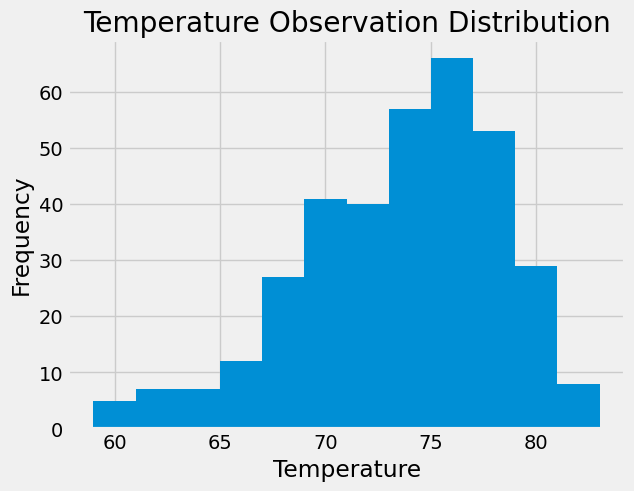

In [25]:
popular_observations = session.query(Measurement.tobs).\
    filter(func.strftime(Measurement.date)>=query_date).\
    filter(Measurement.station == 'USC00519281')    

popular_observations_df = pd.DataFrame(popular_observations, columns=['tobs'])

plt.hist(popular_observations_df['tobs'], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Observation Distribution")
plt.show()

# Close Session

In [26]:
# Close Session
session.close()